# IMPORT LIBRARY PYTHON STATISTICAL
This process imports the libraries needed to carry out statistical testing using the Python programming language

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import skewtest
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import spearmanr
from statsmodels.stats.diagnostic import het_white
from patsy import dmatrices
from statsmodels.formula.api import ols
from scipy.stats import f

In [2]:
df=pd.read_excel('/kaggle/input/data-research/DATA.xlsx', index_col=0)

# DESCRIPTION STATISTIC
Statistical description refers to the process of summarizing and describing the main features of a dataset. This involves using various statistical measures and techniques to gain insights into the central tendency, dispersion, and shape of the data distribution.

In [3]:
df.describe().style.background_gradient(cmap='gist_earth_r')

,TAHUN,GTA,GFA,INV,CAPTA,ROA,CF,GTAxCF,GFAxCF,INVxCF,CAPTAxCF,ROAxCF
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2020.000000,0.093500,0.083250,0.737850,0.280950,0.102400,0.440300,0.010940,0.009740,0.086328,0.032871,0.011981
std,1.432230,0.123219,0.152223,0.120350,0.223967,0.061862,0.631061,0.014417,0.017810,0.014081,0.026204,0.007238
min,2018.000000,-0.141000,-0.124000,0.414000,-0.069000,0.001000,0.014000,-0.016497,-0.014508,0.048438,-0.008073,0.000117
25%,2019.000000,0.011500,-0.006250,0.652750,0.138250,0.056500,0.122500,0.001345,-0.000731,0.076372,0.016175,0.006611
50%,2020.000000,0.075000,0.053500,0.747000,0.217000,0.101000,0.207000,0.008775,0.006260,0.087399,0.025389,0.011817
75%,2021.000000,0.163000,0.138000,0.844250,0.385250,0.143250,0.343000,0.019071,0.016146,0.098777,0.045074,0.016760
max,2022.000000,0.493000,0.581000,0.887000,0.794000,0.223000,2.641000,0.057681,0.067977,0.103779,0.092898,0.026091


# DEFINITION OF VARIABLE
In the context of statistics and mathematics, a variable is a quantity or characteristic that can take on different values. Variables are used to represent information in a mathematical or statistical model. They are essentially symbols that represent an unknown or changing quantity. Variables can be classified into different types based on their nature and the kind of values they can take.

## DEPENDENT VARIABLE
The dependent variable is the variable that is observed and measured in response to changes in the independent variable. It is the variable that is affected by the changes in the independent variable. In a mathematical equation or model, the dependent variable is typically denoted by **y** or another letter.

variable dependent in this research is **Return On Asset (ROA)**
is a financial ratio that measures a company's efficiency in utilizing its assets to generate profit. It is expressed as a percentage and provides insight into how well a company is able to generate earnings from its total assets. The formula for Return on Assets is:

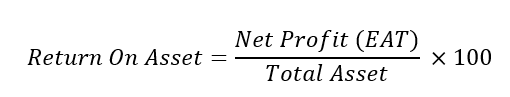

## INDEPENDENT VARIABLE
The independent variable is the variable that is manipulated or controlled in an experiment or study. It is the variable that is thought to cause changes in another variable (the dependent variable). In a mathematical equation or model, the independent variable is typically denoted by x.

variable dependent X1 in this research is **Growth Total Asset**
**Growth Total Asset** is "Growth Total Asset" typically refers to the rate at which a company's total assets are increasing over a specific period. It is a financial metric that assesses the expansion or contraction of a company's asset base. The formula for calculating the growth in total assets is as follows:
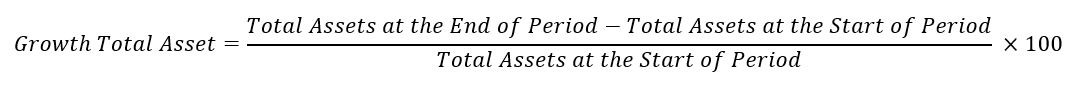

variable dependent X2 in this research is **Growth Rate of Fixed Asset**
The growth rate of fixed assets is a financial metric that assesses the percentage change in a company's fixed assets over a specific period. Fixed assets, also known as property, plant, and equipment (PP&E), include long-term assets that a company uses in its operations and that are not easily converted into cash.  The formula for calculating the growth rate of fixed assets is similar to the formula for overall asset growth:
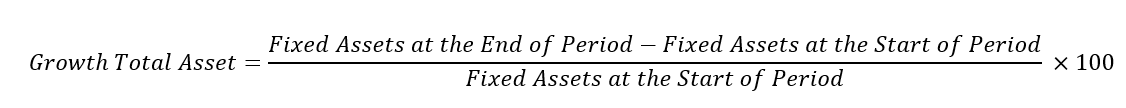

variable dependent X3 in this research is **Investment Index**
An **"Investment Index"** typically refers to a benchmark or measure that tracks the performance of a group of investments or a specific market segment. Investment indices are used by investors, financial analysts, and fund managers to gauge the overall performance of an investment portfolio or market.

## MODERATING VARIABLE
A moderating variable, in the context of statistical analysis and research, is a variable that affects the strength or direction of the relationship between an independent variable and a dependent variable. In other words, a moderating variable modifies the impact of the independent variable on the dependent variable.

variable moderating z in this researh is **cash flow**
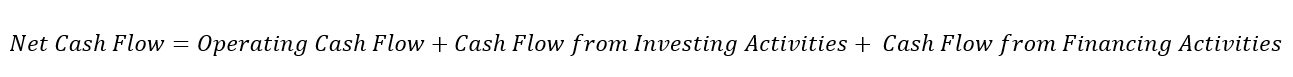


# MODELING RESEARCH
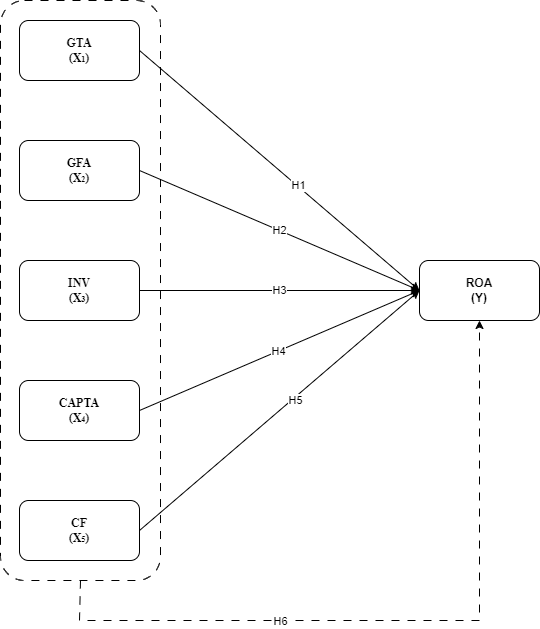

In [4]:
X = df[['GTA','GFA','INV','CAPTA','CF']]
Y = df['ROA']
X = sm.add_constant(X)

# DATA OUTLIER
An outlier in a set of data points is an observation that lies an abnormal distance from other values in a random sample from a population. In simpler terms, an outlier is a data point that significantly differs from the rest of the data. Outliers can occur for various reasons, such as errors in data collection, measurement variability, or genuine anomalies in the data.

<Axes: >

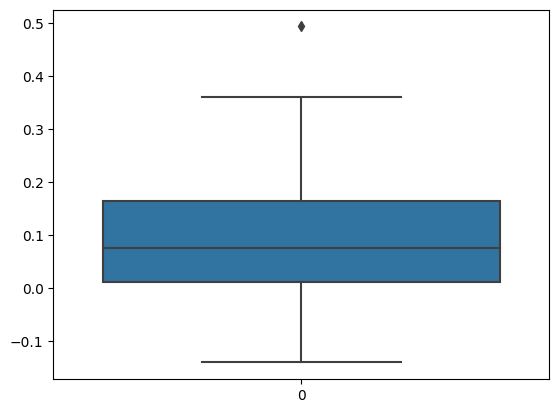

In [5]:
sns.boxplot(df['GTA'])

<Axes: >

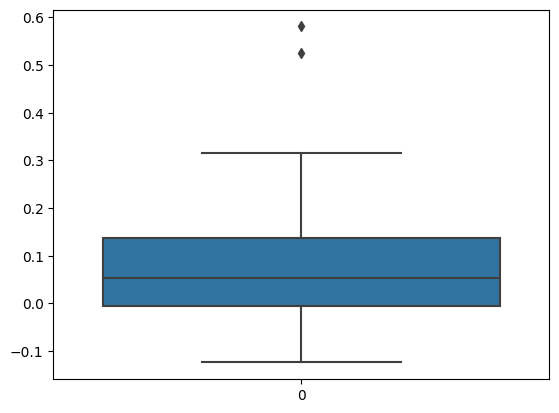

In [6]:
sns.boxplot(df['GFA'])

<Axes: >

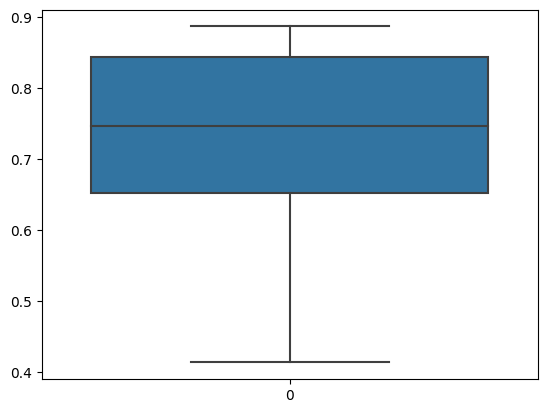

In [7]:
sns.boxplot(df['INV'])

<Axes: >

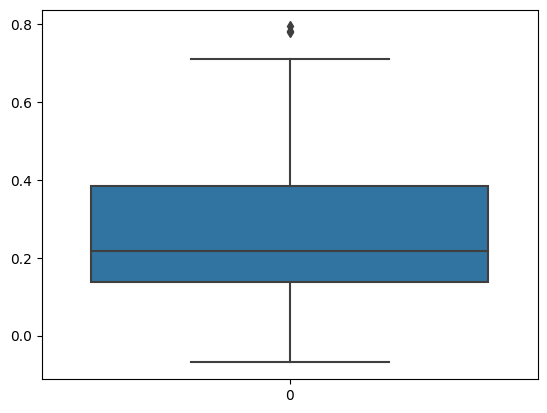

In [8]:
sns.boxplot(df['CAPTA'])

# NORMALITY TEST
In statistics, normality tests are used to determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

More precisely, the tests are a form of model selection, and can be interpreted several ways, depending on one's interpretations of probability:
* In descriptive statistics terms, one measures a goodness of fit of a normal model to the data – if the fit is poor then the data are not well modeled in that respect by a normal distribution, without making a judgment on any underlying variable.
* In frequentist statistics statistical hypothesis testing, data are tested against the null hypothesis that it is normally distributed.
* In Bayesian statistics, one does not "test normality" per se, but rather computes the likelihood that the data come from a normal distribution with given parameters μ,σ (for all μ,σ), and compares that with the likelihood that the data come from other distributions under consideration, most simply using a Bayes factor (giving the relative likelihood of seeing the data given different models), or more finely taking a prior distribution on possible models and parameters and computing a posterior distribution given the computed likelihoods.

A normality test is used to determine whether sample data has been drawn from a normally distributed population (within some tolerance). A number of statistical tests, such as the Student's t-test and the one-way and two-way ANOVA, require a normally distributed sample population.

## Kolmogorov Smirnov
the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous, see Section 2.2), one-dimensional probability distributions that can be used to test whether a sample came from a given reference probability distribution (one-sample K–S test), or to test whether two samples came from the same distribution (two-sample K–S test).

In [9]:
# Inisialisasi list untuk hasil uji
hasil_uji = []

# Variabel x
for column in ['GTA', 'GFA', 'INV', 'CAPTA','CF']:
    data = df[column]
    statistic, p_value = kstest(data, 'norm')
    kesimpulan_x = 'Reject' if p_value < 0.05 else 'Accept'
    hasil_uji.append({
        'Variabel': column,
        'Statistik': statistic,
        'P-value': p_value,
        'Kesimpulan': kesimpulan_x
    })

# Variabel y
data_y = df['ROA']
statistic_y, p_value_y = kstest(data_y, 'norm')
kesimpulan_y = 'Reject' if p_value_y < 0.05 else 'Accept'
hasil_uji.append({
    'Variabel': 'ROA',
    'Statistik': statistic_y,
    'P-value': p_value_y,
    'Kesimpulan': kesimpulan_y
})

# Membuat DataFrame dari hasil uji
hasil_uji_df = pd.DataFrame(hasil_uji)

# Menampilkan hasil uji
print(hasil_uji_df)

  Variabel  Statistik       P-value Kesimpulan
0      GTA   0.448291  7.482764e-08     Reject
1      GFA   0.450658  6.192785e-08     Reject
2      INV   0.660563  1.148886e-17     Reject
3    CAPTA   0.472495  1.019490e-08     Reject
4       CF   0.505585  5.384441e-10     Reject
5      ROA   0.500399  8.683646e-10     Reject


## Jarque-Bera
The Jarque-Bera test is a normality test that measures differences in skewness and kurtosis of data. This test measures whether the sample's skewness and kurtosis conform to a normal distribution.

The Jarque-Bera test measures the difference in skewness with the mean and standard deviation obtained from the initial sample. The Jarque Bera statistic follows a chi-square distribution with two degrees of freedom.

In [10]:
# Membuat model regresi
model = sm.OLS(Y, X)

# Menyesuaikan model ke data
results = model.fit()

# Menghitung residu
residuals = results.resid

# Melakukan uji Jarque-Bera
jarque_bera_test_statistic, p_value, _, _ = sm.stats.stattools.jarque_bera(residuals)

# Menyimpan hasil uji ke dalam DataFrame
columns = ['Jarque-Bera Test Statistic', 'P-value']
results_table = pd.DataFrame(columns=columns)
results_table.loc[0] = [jarque_bera_test_statistic, p_value]

print(results_table)

# Menampilkan kesimpulan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Residu tidak terdistribusi normal.")
else:
    print("Terima H0: Residu terdistribusi normal.")

   Jarque-Bera Test Statistic   P-value
0                    1.106057  0.575205
Terima H0: Residu terdistribusi normal.


## Shapiro Wilk
The Shapiro-Wilk test is a statistical method used to test whether data is normally distributed. This test was developed in 1965 by two statisticians named Samuel Shapiro and Martin Wilk.

The Shapiro-Wilk test is a hypothesis test applied to samples with the null hypothesis that the sample results from a normal distribution. If the p value is low, we can reject the null hypothesis and say that the sample was not generated from a normal distribution.

In [11]:
# Membuat model regresi
model = sm.OLS(Y, sm.add_constant(X))

# Menyesuaikan model ke data
results = model.fit()

# Menghitung residu
residuals = results.resid

# Melakukan uji Shapiro-Wilk
shapiro_test_statistic, p_value = shapiro(residuals)

# Menampilkan hasil dalam bentuk tabel
columns = ['Shapiro-Wilk Test Statistic', 'P-value']
results_table = pd.DataFrame(columns=columns)
results_table.loc[0] = [shapiro_test_statistic, p_value]

print(results_table)

# Menampilkan kesimpulan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The residues are not normally distributed.")
else:
    print("Accept H0: Residues are normally distributed.")

   Shapiro-Wilk Test Statistic   P-value
0                     0.976918  0.576524
Accept H0: Residues are normally distributed.


## Lilliefors test

The Lilliefors test is a normality test method used to determine whether data is normally distributed or not in the form of single data. This test is very effective for small to medium sample sizes, approximately 50 to 500 samples to be precise.
The Lilliefors method uses basic data that has not been processed in a frequency distribution table. The data is transformed into Z values ​​to calculate the area of ​​the normal curve as a normal cumulative probability.

In [12]:
# Membuat model regresi
model = sm.OLS(Y, sm.add_constant(X))

# Menyesuaikan model ke data
results = model.fit()

# Menghitung residu
residuals = results.resid

# Melakukan uji Lilliefors
lilliefors_test_statistic, p_value = lilliefors(residuals)

# Menampilkan hasil dalam bentuk tabel
columns = ['Lilliefors Test Statistic', 'P-value']
results_table = pd.DataFrame(columns=columns)
results_table.loc[0] = [lilliefors_test_statistic, p_value]

print(results_table)

# Menampilkan kesimpulan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The residues are not normally distributed.")
else:
    print("Accept H0: Residues are normally distributed.")

   Lilliefors Test Statistic   P-value
0                   0.105492  0.317241
Accept H0: Residues are normally distributed.


# AUTOCORELATION TEST
Autocorrelation refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series.

## RUN TESTING
Run tests are part of non-parametric statistics that can be used to test whether there is a high correlation between residuals. If there is no correlation between the residuals, it can be said that the residuals are random.

In [13]:
# Membuat model regresi
model = sm.OLS(Y, sm.add_constant(X))

# Menyesuaikan model ke data
results = model.fit()

# Menghitung residu
residuals = results.resid

# Menjalankan uji Run Test
run_test_result = runstest_1samp(residuals)

# Menampilkan hasil dalam bentuk tabel
columns = ['Runs Test Statistic', 'P-value']
results_table = pd.DataFrame(columns=columns)
results_table.loc[0] = [run_test_result[0], run_test_result[1]]

print(results_table)

# Menampilkan kesimpulan berdasarkan p-value
alpha = 0.05
if run_test_result[1] < alpha:
    print("Reject H0: There is a sequence pattern in the residues.")
else:
    print("Accept H0: There is no sequence pattern in the residues.")

   Runs Test Statistic   P-value
0            -0.800904  0.423187
Accept H0: There is no sequence pattern in the residues.


## DURBIN-WATSON TESTING


In [14]:
# Membuat model regresi
model = sm.OLS(Y, X)
result = model.fit()

# Melakukan uji Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(result.resid)

# Menyusun hasil uji dalam bentuk tabel
DW = pd.DataFrame({
    'Variabel': ['Durbin-Watson Statistic'],
    'Nilai': [durbin_watson_statistic],
    'Kesimpulan': ['There is no or very little autocorrelation' if durbin_watson_statistic in (1.5, 2.5) else 'Autokorelasi mungkin ada']
})

# Menampilkan DataFrame hasil uji
print(DW)

                  Variabel     Nilai                Kesimpulan
0  Durbin-Watson Statistic  1.427862  Autokorelasi mungkin ada


## BREUSCH-GODFREY SERIAL CORRELATION LM TEST
the Breusch–Godfrey test is used to assess the validity of some of the modelling assumptions inherent in applying regression-like models to observed data series. In particular, it tests for the presence of serial correlation that has not been included in a proposed model structure and which, if present, would mean that incorrect conclusions would be drawn from other tests or that sub-optimal estimates of model parameters would be obtained.

In [15]:
model = sm.OLS(Y, X)
result = model.fit()

# Calculate residuals
residuals = result.resid

# Adding residuals to the DataFrame
df['Residuals'] = residuals

# Performing the Breusch-Godfrey Serial Correlation LM Test
lags = 2  # Number of lags for the test
bg_test_statistic, bg_p_value, _, _ = acorr_breusch_godfrey(result, nlags=lags)

# Creating a table to display the results
BGSC = pd.DataFrame({
    'Uji': ['Breusch-Godfrey Serial Correlation LM Test'],
    'Test Statistic': [bg_test_statistic],
    'P-value': [bg_p_value],
    'Kesimpulan': ['There is no evidence of autocorrelation' if bg_p_value > 0.05 else 'There is evidence of autocorrelation']
})

# Displaying the results
print(BGSC)

                                          Uji  Test Statistic   P-value  \
0  Breusch-Godfrey Serial Correlation LM Test        5.448275  0.065603   

                                Kesimpulan  
0  There is no evidence of autocorrelation  


# MULTICOLLINEARTIY TEST
Multicollinearity is a statistical phenomenon in regression analysis where two or more independent variables in a multiple regression model are highly correlated, making it difficult to identify the individual effects of each variable on the dependent variable. It doesn't affect the overall fit of the model, but it can lead to inflated standard errors and difficulties in interpreting the coefficients.

In [16]:
Y, X = dmatrices('ROA ~ GTA+GFA+INV+CAPTA+CF', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,Intercept,45.807634
1,GTA,2.897535
2,GFA,2.596678
3,INV,1.364960
4,CAPTA,4.125101
5,CF,3.750820


# HETEROSKEDASTICTY TEST
Heteroskedasticity is a term used in regression analysis to describe a situation where the variability of the errors (residuals) in a regression model is not constant across all levels of the independent variable(s). In simpler terms, the spread of residuals changes as the values of the independent variable(s) change.

## Scater Plot
A scatter plot is a mathematical diagram that uses dots to represent the values ​​of two different numerical variables. Scatter plots are also called scatter graphs, scatter charts, scattergrams, or scatter diagrams.

Scatter plots use Cartesian coordinates to display the values ​​of usually two variables for a set of data. The position of each point on the horizontal and vertical axes indicates the value for the individual data point.

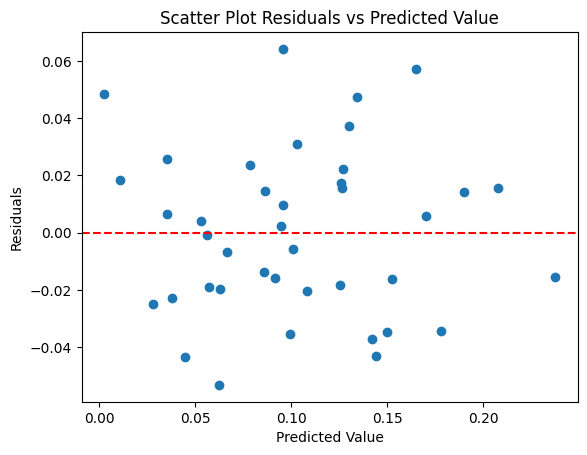

Het-BP Test Statistic: 1.7129558907665254
P-value: 0.8872635119675808
Accept H0: There is no indication of heteroscedasticity.


In [17]:
# Membuat model regresi
model = sm.OLS(Y, X)
results = model.fit()

# Menghitung residu
residuals = results.resid

# Menghitung nilai prediksi
predicted_values = results.fittedvalues

# Scatter plot dari residual terhadap nilai prediksi
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Scatter Plot Residuals vs Predicted Value")

# Menambahkan garis horizontal pada nilai y=0 untuk referensi
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

# Melakukan uji Breusch-Pagan untuk heteroskedastisitas
het_bp_test_statistic, het_bp_p_value, _, _ = het_breuschpagan(residuals, X)
print(f"Het-BP Test Statistic: {het_bp_test_statistic}")
print(f"P-value: {het_bp_p_value}")

# Kesimpulan berdasarkan p-value
if het_bp_p_value < 0.05:
    print("Reject H0: there are indications of heteroscedasticity.")
else:
    print("Accept H0: There is no indication of heteroscedasticity.")

## White Testing
The White test, also known as the White heteroskedasticity test, is a statistical test used to assess the presence of heteroskedasticity in a regression model. Heteroskedasticity refers to a situation where the variability of the errors (residuals) in a regression model is not constant across all levels of the independent variable(s). In the context of the White test, it specifically checks for heteroskedasticity by examining whether there is a pattern in the squared residuals.

In [18]:
# Membuat model regresi
model = sm.OLS(Y, X)
results = model.fit()

# Menghitung residu
residuals = results.resid

# Melakukan uji White
white_test_statistic, white_p_value, fstat, fp_value = het_white(residuals, X)

# Menampilkan hasil dalam bentuk tabel
columns = ['Lagrange Multiplier Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results_table = pd.DataFrame(columns=columns)
results_table.loc[0] = [white_test_statistic, white_p_value, fstat, fp_value]

print(results_table)

   Lagrange Multiplier Statistic  LM-Test p-value  F-Statistic  F-Test p-value
0                       18.95375         0.524834     0.855547        0.634549


# REGRESION LINEAR
Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal of linear regression is to find the best-fitting line, often referred to as the "regression line" or "line of best fit," that minimizes the sum of squared differences between the observed values and the values predicted by the linear model.

In [19]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.12500824]
Coefficients: 
 [[0.         0.13869099 0.0186468  0.25244903 0.04151896 0.03396326]]


In [20]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     23.94
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           3.00e-10
Time:                        10:12:09   Log-Likelihood:                 85.236
No. Observations:                  40   AIC:                            -158.5
Df Residuals:                      34   BIC:                            -148.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1250      0.033     -3.749      0.0

# CALCULATING REGRESSION VALUES
The mean value of regression shows that a single value of a dependent variable exists for different values of the independent variable, but it is not the case. For each individual value of the independent variable, the value of the dependent variable varies.

In [21]:
# Koefisien regresi
intercept = -0.1250
GTA       = 0.1387
GFA       = 0.0186
INV       = 0.2524
CAPTA     = 0.0415
CF        = 0.0340
ERR       = 0.033

# Menghitung nilai regresi
ROA = intercept + GTA + GFA + INV + CAPTA + CF + ERR

print(f"Regression Calculation Results: {ROA} = {intercept}intercept + {GTA}GTA + {GFA}GFA + {INV}INV + {CAPTA}CAPTA + {CF}CF + {ERR}ERROR")

Regression Calculation Results: 0.3932 = -0.125intercept + 0.1387GTA + 0.0186GFA + 0.2524INV + 0.0415CAPTA + 0.034CF + 0.033ERROR
